<h1 style="text-align:left;font-size:200%;;">Employee Attrition Analysis and Prediction with SVM</h1>
<h4 style="text-align:left;">Prepared by  : BOUKIR Fatima Ezzahrae </h4>

## Import libraries


In [51]:
import pandas as pd #reading & loading the data 
from sklearn.preprocessing import MinMaxScaler #standardizing the data 
from sklearn.model_selection import train_test_split # split the data into test & train 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # Encode the categorical data into numerical valeus
from sklearn import svm, datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report,ConfusionMatrixDisplay # model evaluation
from sklearn.model_selection import GridSearchCV # cross validation & tuning parameter

## Loading the database

#### Read the csv file and study the database

In [52]:
attrition_data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv", dtype = str)
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [53]:
# more data informations
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   object
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   object
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   object
 6   Education                 1470 non-null   object
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   object
 9   EmployeeNumber            1470 non-null   object
 10  EnvironmentSatisfaction   1470 non-null   object
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   object
 13  JobInvolvement            1470 non-null   object
 14  JobLevel                

In [54]:
# data forme
attrition_data.shape

(1470, 35)

In [55]:
# explore data type
attrition_data.dtypes

Age                         object
Attrition                   object
BusinessTravel              object
DailyRate                   object
Department                  object
DistanceFromHome            object
Education                   object
EducationField              object
EmployeeCount               object
EmployeeNumber              object
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                  object
JobInvolvement              object
JobLevel                    object
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome               object
MonthlyRate                 object
NumCompaniesWorked          object
Over18                      object
OverTime                    object
PercentSalaryHike           object
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours               object
StockOptionLevel            object
TotalWorkingYears   

In [73]:
# Convert columns with numerical data from object to numeric types
numeric_columns = [
    'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
    'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',
    'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
    'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
    'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
    'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

# Convert each column to numeric type
for column in numeric_columns:
    attrition_data[column] = pd.to_numeric(attrition_data[column], errors='coerce')

# Confirm the changes
attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   float64
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   float64
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   float64
 14  JobLevel

In [74]:
# Descriptive Statistics
attrition_data.describe().rename({'50%': 'median'}).T

,count,mean,std,min,25%,median,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,1.912925,1.024165,0.0,1.00,2.0,3.00,4.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,1.721769,1.093082,0.0,1.00,2.0,3.00,3.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,1.729932,0.711561,0.0,1.00,2.0,2.00,3.0
JobLevel,1470.0,1.063946,1.106940,0.0,0.00,1.0,2.00,4.0


In [75]:
# Show number of missing values per column
print(attrition_data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### data visualization

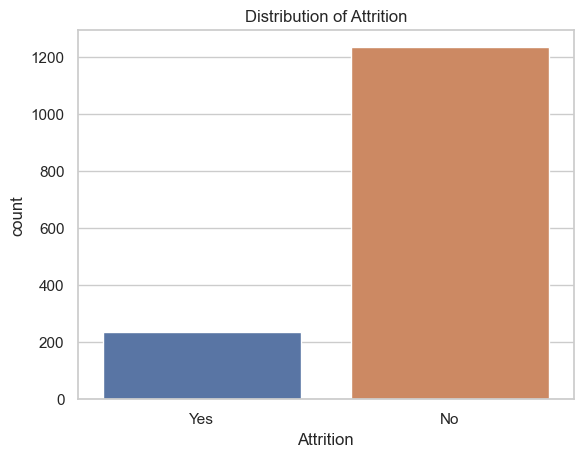

In [76]:
# Count plot for the target variable (Attrition)
sns.countplot(x='Attrition', data=attrition_data)
plt.title('Distribution of Attrition')
plt.show()

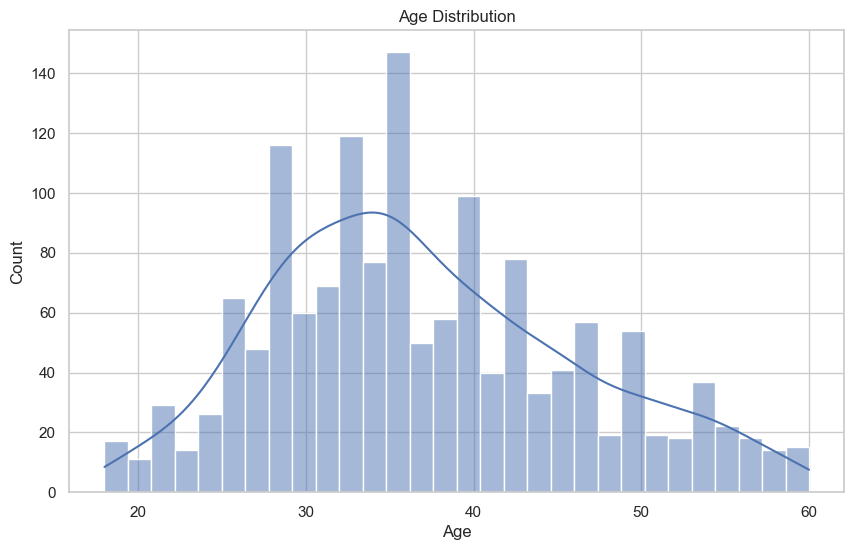

In [24]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(attrition_data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

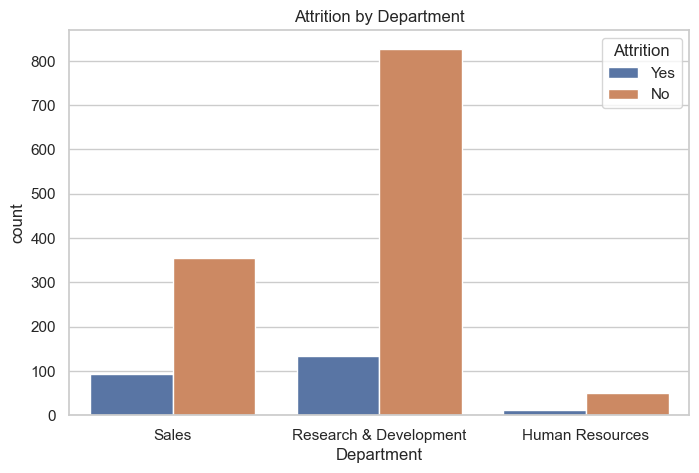

In [77]:
# Count plot for Department
plt.figure(figsize=(8, 5))
sns.countplot(x='Department', hue='Attrition', data=attrition_data)
plt.title('Attrition by Department')
plt.show()

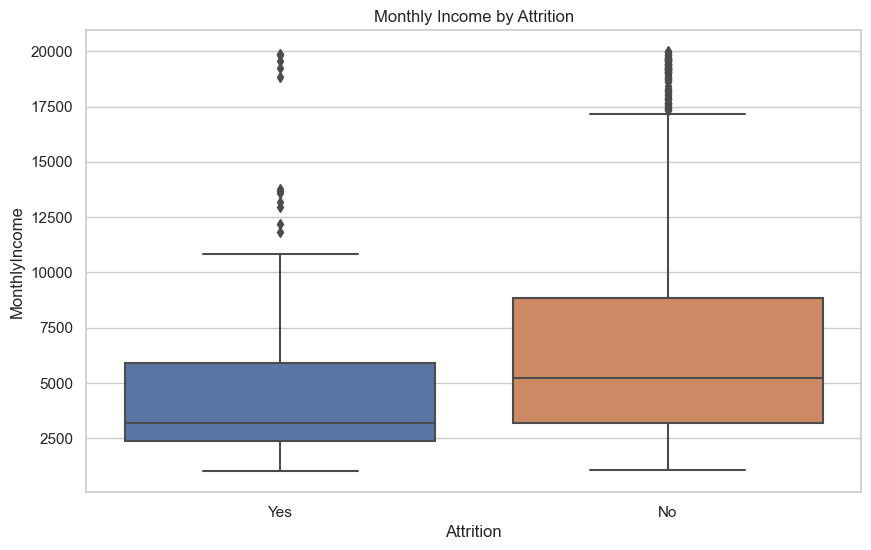

In [27]:
# Boxplot for Monthly Income by Attrition
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=attrition_data)
plt.title('Monthly Income by Attrition')
plt.show()

<Figure size 500x500 with 0 Axes>

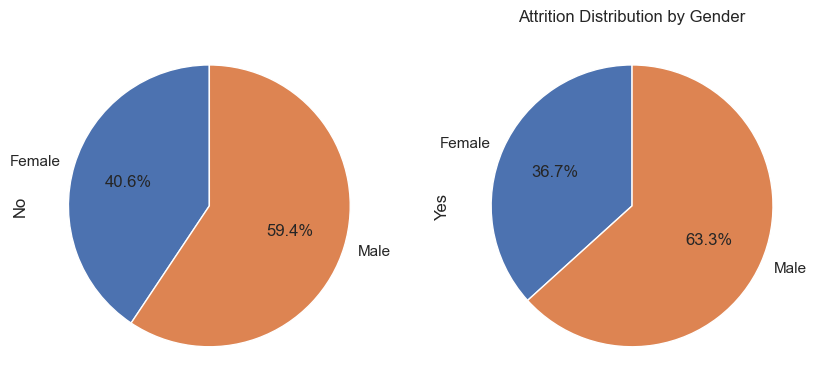

In [78]:
# Pie chart for Attrition by Gender
plt.figure(figsize=(5, 5))
gender_attrition_counts = attrition_data.groupby(['Gender', 'Attrition']).size().unstack()
gender_attrition_counts.plot.pie(subplots=True, autopct='%1.1f%%', startangle=90, figsize=(10, 8), legend=False, labels=gender_attrition_counts.index)
plt.title('Attrition Distribution by Gender')
plt.show()



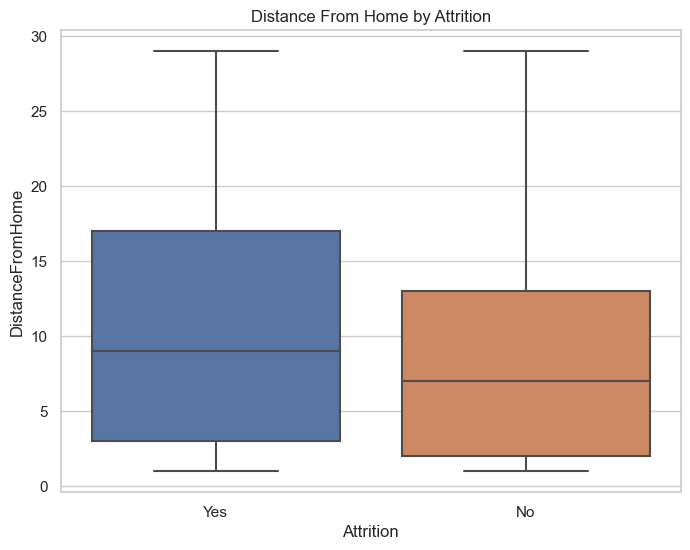

In [79]:
# Boxplot for Distance From Home by Attrition
plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=attrition_data)
plt.title('Distance From Home by Attrition')
plt.show()

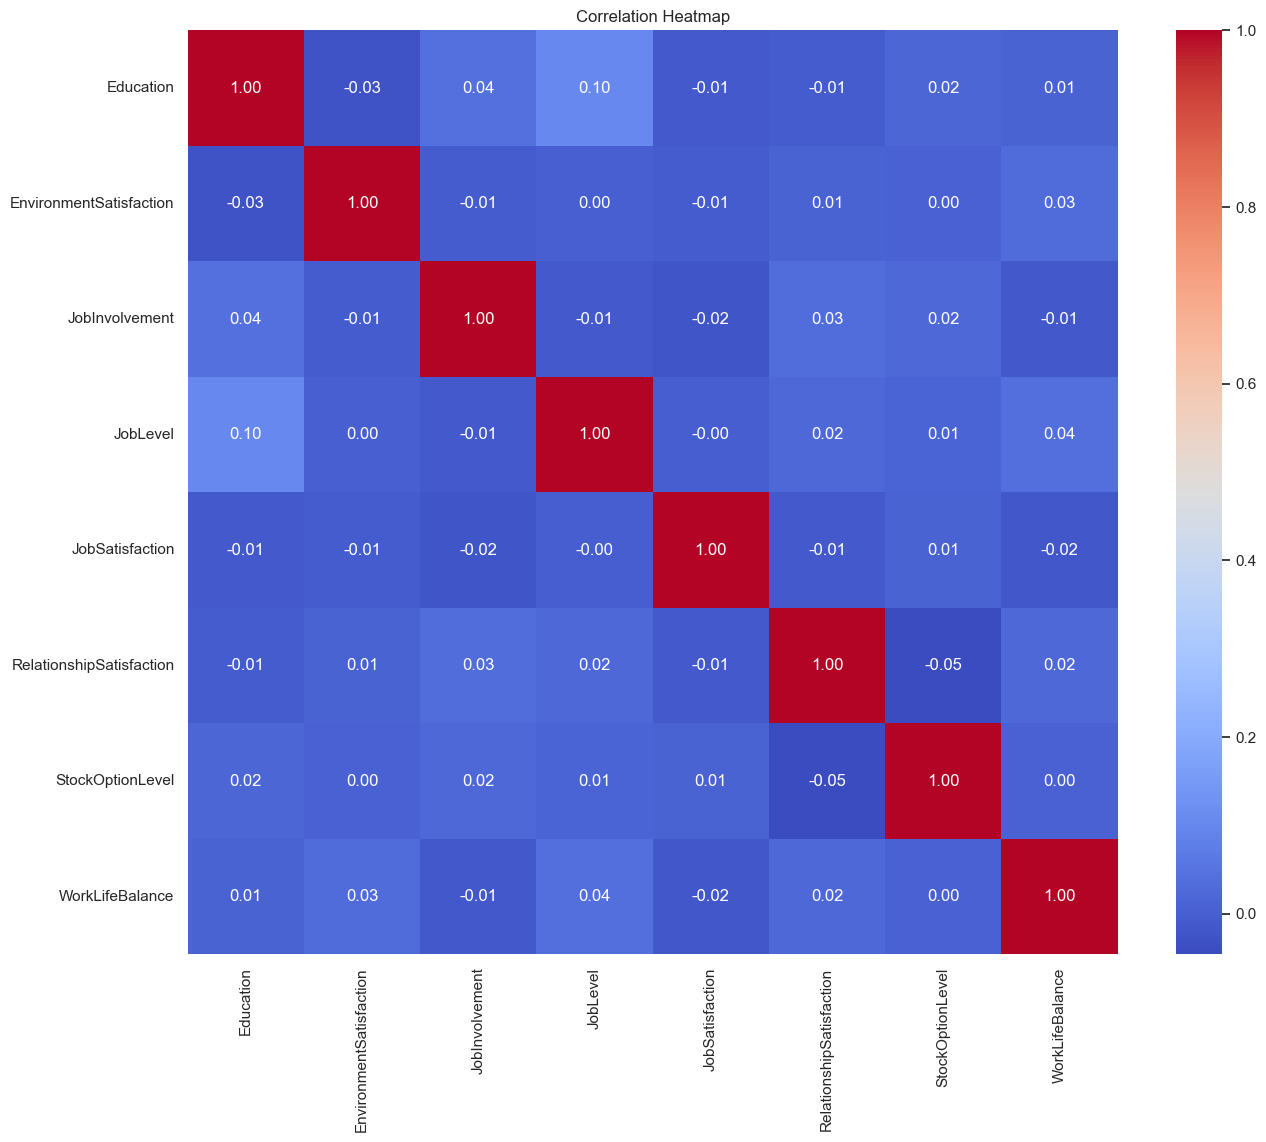

In [61]:
# Select only numeric columns
numeric_columns = attrition_data.select_dtypes(include=['float64', 'int64'])
# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()
# Create a heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## Preprocessing

#### Define the target and the inputs

In [191]:
target = attrition_data['Attrition']
inputs = attrition_data.drop(['Attrition'],axis=1)

#### Create a training and a testing dataset

In [192]:
x_train, x_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2, random_state=150, stratify = target)

#### Check the result from the stratification

In [193]:
y_train.value_counts(normalize = True)

Attrition
No     0.838435
Yes    0.161565
Name: proportion, dtype: float64

In [194]:
pd.Series(y_test).value_counts(normalize = True)

Attrition
No     0.840136
Yes    0.159864
Name: proportion, dtype: float64

#### Define a separate encoder for the target and the inputs 

In [195]:
enc_i = OrdinalEncoder()
enc_t = LabelEncoder()

#### Apply the fit_transform() method on the training data and the transform() method on the test data.

In [196]:
# Create an OrdinalEncoder instance for features
enc_i = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
x_train_transf = enc_i.fit_transform(x_train)
x_test_transf = enc_i.transform(x_test)
enc_t = LabelEncoder()
y_train_transf = enc_t.fit_transform(y_train)
y_test_transf = enc_t.transform(y_test)

In [197]:
y_train_transf

array([0, 0, 0, ..., 0, 0, 1])

In [198]:
x_train_transf

array([[ 24.,   2., 256., ...,   3.,   1.,   2.],
       [ 12.,   2., 399., ...,   0.,   0.,   8.],
       [ 25.,   1., 122., ...,   2.,   1.,   2.],
       ...,
       [ 27.,   2., 688., ...,   7.,   3.,   9.],
       [ 15.,   2., 636., ...,   2.,   2.,   2.],
       [ 17.,   2., 373., ...,  12.,   6.,   0.]])

## Rescaling

In [199]:
scaling = MinMaxScaler(feature_range=(-1,1)).fit(x_train_transf)
x_train_rescaled = scaling.transform(x_train_transf)

## Classification

In [200]:
C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(x_train_rescaled, y_train_transf)

In [201]:
enc_t.classes_

array(['No', 'Yes'], dtype=object)

## Evaluation

#### Evaluate the model on the test data

In [202]:
y_pred_test = svc.predict(scaling.transform(x_test_transf))

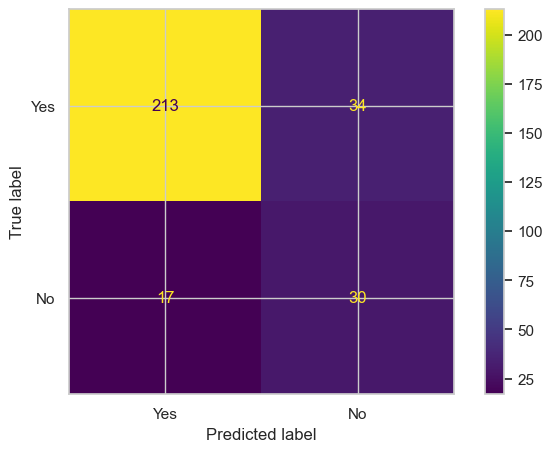

In [206]:
fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_test_transf, y_pred_test),
    display_labels=["Yes", "No"],
)

cmp.plot(ax=ax);

In [207]:
print(classification_report(y_test_transf, y_pred_test, target_names = ["Yes", "No"]))

              precision    recall  f1-score   support

         Yes       0.93      0.86      0.89       247
          No       0.47      0.64      0.54        47

    accuracy                           0.83       294
   macro avg       0.70      0.75      0.72       294
weighted avg       0.85      0.83      0.84       294



#### Evaluate the model on the train data

In [208]:
y_pred_train= svc.predict(scaling.transform(x_train_transf))

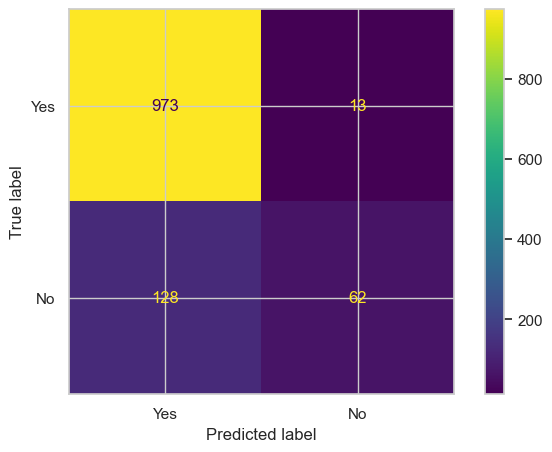

In [209]:
fig, ax = plt.subplots(figsize=(8, 5))

cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_train_transf, y_pred_train),
    display_labels=["Yes", "No"],
)

cmp.plot(ax=ax);

In [210]:
print(classification_report(y_train_transf, y_pred_train, target_names = ["Yes", "No"]))

              precision    recall  f1-score   support

         Yes       0.88      0.99      0.93       986
          No       0.83      0.33      0.47       190

    accuracy                           0.88      1176
   macro avg       0.86      0.66      0.70      1176
weighted avg       0.87      0.88      0.86      1176



## Hyperparameter Tuning with GridSearchCV

### Choose the best kernel and optimal C parameter based on Cross Validation of the training data

In [211]:
tuned_parameters = [
    {"kernel": ["linear"], "C": [0.1, 3]},
    {"kernel": ["poly"], "C":[0.1, 3]},
    {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [0.1, 3]}
]

In [212]:
scores = ["precision", "recall"]

In [213]:
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring="%s_macro" % score)
    clf.fit(x_train_rescaled, y_train_transf)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_["mean_test_score"]
    stds = clf.cv_results_["std_test_score"]
    for mean, std, params in zip(means, stds, clf.cv_results_["params"]):
        print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test_transf, clf.predict(scaling.transform(x_test_transf))
    print(classification_report(y_true, y_pred))
    print()

# Tuning hyper-parameters for precision



C:\Users\Data_Scientist_FATI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Data_Scientist_FATI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Data_Scientist_FATI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Data_Scientist_FATI\anaconda3\Lib\site-pack

Best parameters set found on development set:

{'C': 3, 'kernel': 'linear'}

Grid scores on development set:

0.803 (+/-0.391) for {'C': 0.1, 'kernel': 'linear'}
0.826 (+/-0.104) for {'C': 3, 'kernel': 'linear'}
0.419 (+/-0.000) for {'C': 0.1, 'kernel': 'poly'}
0.765 (+/-0.087) for {'C': 3, 'kernel': 'poly'}
0.419 (+/-0.000) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.419 (+/-0.000) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.419 (+/-0.000) for {'C': 3, 'gamma': 0.001, 'kernel': 'rbf'}
0.419 (+/-0.000) for {'C': 3, 'gamma': 0.0001, 'kernel': 'rbf'}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       247
           1       0.46      0.66      0.54        47

    accuracy                           0.82       294
   macro avg       0.70      0.76      0.72       294
weighted avg       0.85